## Enhancing Computer Vision Models with Data Augmentation in ATLAS Detector Collision Data for Black Holes and Sphalerons

### 1.Describe problem

In this project, we will explore the application of various data augmentation techniques to enhance the performance of Convolutional Neural Networks (CNNs) in the context of ATLAS detector collision data, specifically focusing on two distinct classes: black holes and sphalerons. The dataset comprises two files, each containing 15,000 labeled images representing either black holes or sphalerons, resulting in a total of 30,000 images. Each image has a resolution of 50x50 pixels and 3 color channels representing different layers of the detector. These images can be thought of as being captured by a cylindrical camera since the detector is cylindrically shaped.

To accommodate the cylindrical and right-left symmetry of the images, we will apply appropriate adjustments to the first pooling layer of the CNN. We will experiment with different CNN architectures and use train-test-split for validation to determine which architecture yields the best results.

Following this, we will explore various data augmentation techniques individually and in combination to assess their impact on the model's accuracy. Our goal is to identify the most effective data augmentation strategies for improving the performance of CNNs in analyzing ATLAS detector collision data for black holes and sphalerons.

### 2. Import neseccary libraries and packages
In this section of the code, various libraries are being imported to fulfill different purposes in the project:

- numpy: A popular library for scientific computing in Python, used for handling arrays and performing various mathematical operations.

- matplotlib.pyplot: A plotting library in Python, used for creating graphs and visualizing data.

- torchsummary: A utility for visualizing the structure and summary of PyTorch models.

- sys and pathlib.Path: Python built-in libraries for working with the system and file paths, respectively.

- torch: The main PyTorch library, a popular framework for deep learning and tensor computation.

- torchvision: A PyTorch library for working with image datasets and pre-trained models in computer vision tasks.

- torch.nn and torch.nn.functional: PyTorch libraries for defining neural network layers and applying various functions/operations.

- torch.optim: PyTorch library for optimization algorithms, used during model training.

- torch.utils.data: PyTorch library for handling datasets, dataloaders, and other data-related utilities.

- PIL.Image: Python Imaging Library (PIL) for opening, manipulating, and saving image files.

- sklearn.model_selection.train_test_split: A utility from the Scikit-learn library to split data into training and testing sets.

- sklearn.metrics.confusion_matrix and sklearn.metrics.precision_recall_fscore_support: Scikit-learn utilities for evaluating model performance through confusion matrix and precision, recall, and F1-score metrics.

- pandas: A powerful data manipulation library in Python, primarily used for data analysis and manipulation with DataFrames.

- seaborn: A statistical data visualization library in Python, built on top of Matplotlib, providing high-level interfaces for creating aesthetically pleasing and informative statistical graphics.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from torchsummary import summary

import sys
from pathlib import Path

import torch
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, TensorDataset
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms

from torchvision.transforms import Compose, RandomCrop, RandomHorizontalFlip, RandomRotation, RandomVerticalFlip, Resize, ToTensor

from sklearn.model_selection import train_test_split

### 2. Import data
This code snippet is responsible for importing custom methods from a module, loading the required data files, and setting up the file paths. The code first determines the path to the "methods" folder that contains the custom modules by navigating the directory structure using Path.cwd() and .parents[] properties. It then checks if the module_path is already present in the sys.path. If not, it appends it to sys.path, allowing the script to import custom modules from that folder.

Afterward, the custom dataloader module is imported. The plotCreator import is commented out, suggesting it is not used in the current implementation.

Finally, the paths for the two data files containing black holes and sphalerons events are set using the Path library, which provides a convenient way to work with file paths across different operating systems.

As well we check if our system recognizes and uses GPU for faster data processing

In [2]:
# Constructs a path to a directory that contains dataloader.py and plotCreator.py
module_path = str(Path.cwd().parents[0] / "methods")

# Checks to see if the directory is already in sys.path to avoid adding it multiple times.
if module_path not in sys.path:
    sys.path.append(module_path)

# Imports all the functions defined in the dataloader.py
from dataloader import *

# Creates two file paths pointing to two HDF5 files
data_path0 = str(Path.cwd().parents[0] / "data" / "BH_n4_M10_res50_15000_events.h5")
data_path1 = str(Path.cwd().parents[0] / "data" / "PP13-Sphaleron-THR9-FRZ15-NB0-NSUBPALL_res50_15000_events.h5")


In [3]:
#Check if device is running on GPU
if torch.cuda.is_available():
    device = torch.device("cuda")
    print("Running on the GPU")
else:
    device = torch.device("cpu")
    print("Running on the CPU")

Running on the GPU


### 2. Visualize data
In this code snippet, two functions get2dHistograms and dataToArray are defined in dataloader.py, which help load and manipulate data from an HDF5 file. Then, the functions are used to load the black holes and sphalerons data into arrays.

The get2dHistograms function accepts a file path and reads the HDF5 file using the h5py library. It retrieves the keys in the file and extracts the corresponding data into a list of datasets.

The dataToArray function takes the path of the data file as input and calls the get2dHistograms function. It then converts the loaded data into a NumPy array using the numpy library.

Finally, the black holes and sphalerons data are loaded into NumPy arrays bhArray and sphArray using the dataToArray function and the respective data file paths.

Next we visualize data adn some information about it to confirm if data is in correct format as well as gettign a better insight

In [4]:
# Reads the two HDF5 data files and creates two NumPy arrays
bhArray = dataToArray(data_path0)
sphArray = dataToArray(data_path1)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


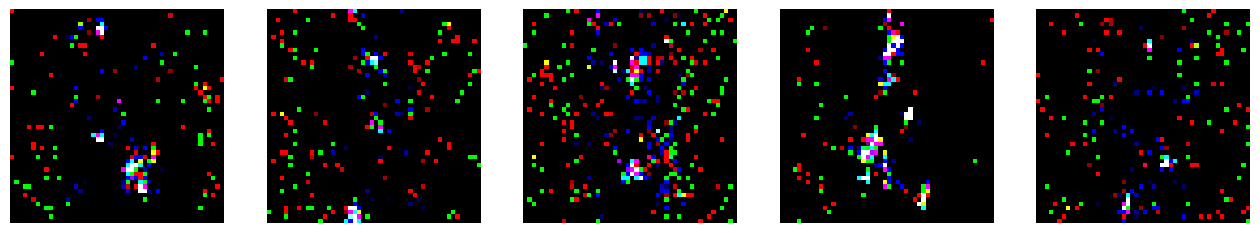

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


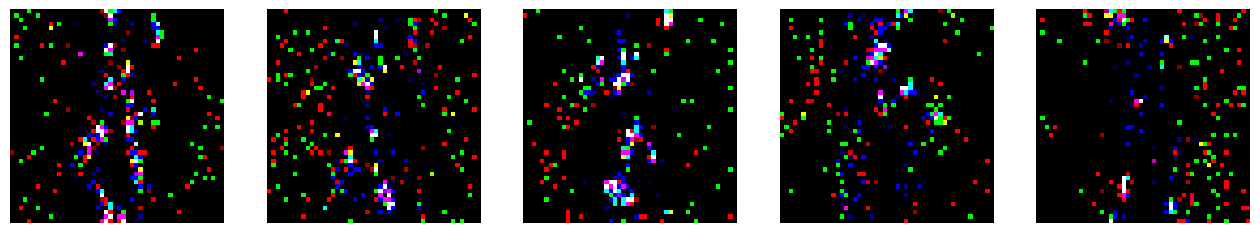

In [5]:
def visualize_images(image_array, cmap='jet'):
    fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(16, 6))
    for i in range(5):
        ax = axes[i]
        ax.imshow(image_array[i], cmap=cmap, vmin=0, vmax=255)
        ax.axis('off')
    plt.show()

# Randomly sample 5 images from each array
# Select the first 5 images from each array
bh_sample = bhArray[:5]
sph_sample = sphArray[:5]


# Visualize the black hole images
visualize_images(bh_sample)

# Visualize the sphaleron images
visualize_images(sph_sample)

In [6]:
print("Black Hole Array has non-zero values:", np.count_nonzero(bhArray))
print("Sphaleron Array has non-zero values:", np.count_nonzero(sphArray))

Black Hole Array has non-zero values: 4292876
Sphaleron Array has non-zero values: 5102456


In [7]:
print("Black Hole Array Shape:", bhArray.shape)
print("Black Hole Array Data Type:", bhArray.dtype)
print("Black Hole Array Max Value:", bhArray.max())
print("Black Hole Array Min Value:", bhArray.min())

print("Sphaleron Array Shape:", sphArray.shape)
print("Sphaleron Array Data Type:", sphArray.dtype)
print("Sphaleron Array Max Value:", sphArray.max())
print("Sphaleron Array Min Value:", sphArray.min())

Black Hole Array Shape: (15000, 50, 50, 3)
Black Hole Array Data Type: float32
Black Hole Array Max Value: 31567.727
Black Hole Array Min Value: 0.0
Sphaleron Array Shape: (15000, 50, 50, 3)
Sphaleron Array Data Type: float32
Sphaleron Array Max Value: 16121.367
Sphaleron Array Min Value: 0.0


### 4. Preprocess data

In [8]:
# Combines the two arrays of data into a single array. It creates a combined dataset
# that can be used for training the machine learning model to distinguish 
# between the two classes.
dataArray = np.concatenate((bhArray, sphArray), axis=0)

# Creating an array of length 30,000 with the first 15,000 elements set to 0 and the
# second 15,000 elements set to 1. This corresponds to the two classes of data: black
# hole (class 0) and sphaleron (class 1).
labelsArray = np.concatenate((np.zeros(15_000),np.ones(15_000)),axis=0)

# Randomly splits the dataArray and labelsArray into two sets. The trainData and trainLabels
# will be used to train the machine learning model, while the testData and testLabels will be 
# used to evaluate the performance of the model. 
trainData, testData, trainLabels, testLabels = train_test_split(dataArray, labelsArray, random_state=42)

In this code, data augmentation techniques are applied to the training data to increase its size and improve the model's performance. The steps involved are:

- Define a function random_shift_y to randomly shift images along the y-axis.
- Define a function augment_images that takes an input array of images and performs the following data augmentation techniques: horizontal flipping, random y-axis shifting, and 180-degree rotation. The augmented images are stored in a new list.
- Apply data augmentation only on the training set and store the result in augmented_trainData.
- Repeat the training labels to match the augmented dataset, and store them in trainLabels_repeated.
- Convert the augmented training data and repeated labels to PyTorch tensors.
- Create a TensorDataset from the augmented training data and repeated labels, and a DataLoader with shuffle enabled and a batch size of 50.
- Apply the same preprocessing step to the test set as the training set, moving the color channel axis to be the first axis.
- Create a TensorDataset for the test data and a DataLoader with shuffle and batch size.

This data preprocessing and augmentation process prepares the data for training a deep learning model using PyTorch. The goal is to improve the model's performance by increasing the variety of training data, which helps the model generalize better to unseen data.

In [9]:
def random_shift_y(img, roll_axis):
    shift = torch.randint(low=0, high=list(img.shape)[roll_axis], size=(1, 1)).item()
    img = torch.roll(img, shift, roll_axis)
    return img

def augment_images(images):
    images = np.moveaxis(images, -1, 1)
    augmented_images = []
    for img in images:
        img = torch.from_numpy(img)
        
        img_flipped_horizontal = torch.flip(img, dims=[2]) #Mirror image of original, aka horizontal flipping on x axis
        img_flipped_vertical = random_shift_y(img, roll_axis=1) #displace top bottom on y axis
        img_rotated_180 = torch.rot90(img, 2, dims=[1, 2]) #Rotation 180 degrees

        augmented_images.extend(
            [img, img_flipped_horizontal, img_flipped_vertical, img_rotated_180]
        )
    return torch.stack(augmented_images)  # Use torch.stack instead of np.array

# Apply data augmentation only on the training set
augmented_trainData = augment_images(trainData)

# Repeat the labels for the training set to match the augmented dataset
trainLabels_repeated = np.repeat(trainLabels, 4)

# Convert the augmented training data and repeated labels to PyTorch tensors
trainLabels_repeated = torch.from_numpy(trainLabels_repeated)

# Create a TensorDataset from the augmented training data and repeated labels
train_augmented = torch.utils.data.TensorDataset(augmented_trainData, trainLabels_repeated)

# Create a DataLoader for the augmented training dataset with shuffle enabled and batch size of 50
trainLoader_augmented = DataLoader(train_augmented, shuffle=True, batch_size=50)

# Apply the same preprocessing step to the test set as the training set
testData_processed = np.moveaxis(testData, -1, 1)

# Create a TensorDataset for the test data
test = torch.utils.data.TensorDataset(torch.from_numpy(testData_processed), torch.from_numpy(testLabels))

# Create a DataLoader for the test data with shuffle and batch size
testLoader = DataLoader(test, shuffle=True, batch_size=50)

This code allows us to looks at images after they have been transformed to see if data augmentation steps were applied

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

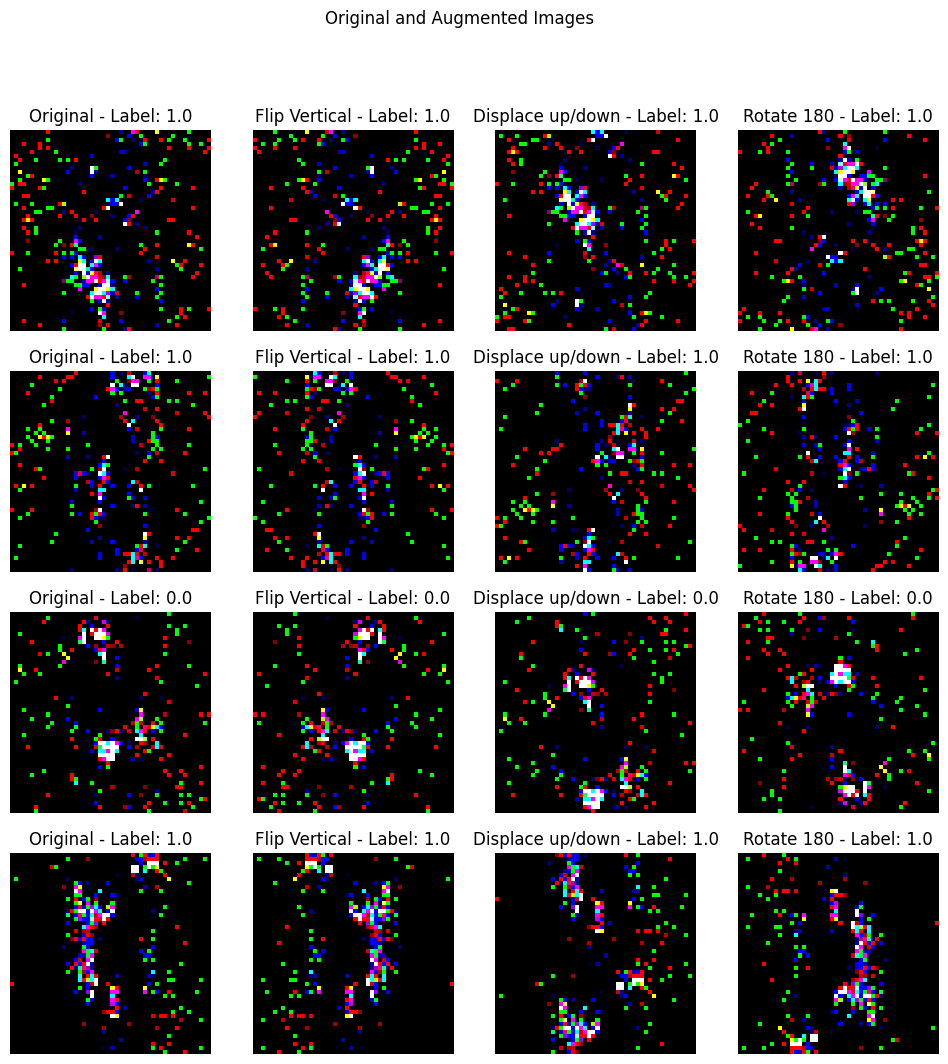

In [10]:
def visualize_comparison(original_images, augmented_images, labels, title, augmentation_info=None):
    n_images = len(original_images)
    n_columns = 4
    n_rows = n_images

    augmented_types = ['Original', 'Flip Vertical', 'Displace up/down', 'Rotate 180']

    fig, axs = plt.subplots(n_rows, n_columns, figsize=(3 * n_columns, 3 * n_rows))
    fig.suptitle(title)

    for i in range(n_images):
        for j in range(n_columns):
            if j == 0:
                img = original_images[i]
            else:
                img = augmented_images[4 * i + j]

            if isinstance(img, np.ndarray):
                img_rgb = np.moveaxis(img, 0, -1) if img.shape[0] == 3 else img
            elif isinstance(img, torch.Tensor):
                img_rgb = np.moveaxis(img.numpy(), 0, -1)

            ax = axs[i, j]
            ax.imshow(img_rgb)
            ax.set_title(f"{augmented_types[j]} - Label: {labels[i]}") #Change here for if label 1 is balck hole label 0 is sphaleron
            ax.axis('off')

    plt.show()

n_samples = 4
original_images = trainData[:n_samples]
original_labels = trainLabels[:n_samples]
augmented_images = augmented_trainData[:4 * n_samples]

visualize_comparison(original_images, augmented_images, original_labels, title="Original and Augmented Images")

### 5. Define our model

In this code, a custom neural network model called VGGNet2 is defined, based on the VGGNet architecture. VGGNet is popular for its simplicity, effectiveness, and ease of understanding, making it a good choice for many computer vision tasks. The architecture consists of multiple convolutional layers followed by pooling and fully connected layers.

This model uses several data augmentation techniques (shifting, flipping, and rotation) in the forward pass to increase its robustness to different input transformations. This can improve the model's generalization capabilities. Dropout is used to regularize the network and prevent overfitting.

The final part of the code creates an instance of the VGGNet2 model with a dropout rate of 0.5 and moves the model to the appropriate device (CPU or GPU). Then, it prints the model summary, which gives an overview of the architecture and the number of trainable parameters.

The VGGNet2 architecture is used over other architectures due to its simplicity and effectiveness in solving computer vision tasks. It has proven to be a strong baseline for many problems, and its straightforward design makes it easier to understand and modify as needed.

This code imports the custom VGGNet2 model from the nnmodel module, instantiates it with a dropout rate of 0.5, and moves the model to the appropriate device (CPU or GPU). The model summary is then printed, giving an overview of the architecture, output shapes of each layer, and the total number of trainable parameters. The input size of the model is specified as (3, 50, 50) for 3-channel (RGB) images of size 50x50 pixels.

In [11]:
import nnmodel

model = nnmodel.VGGNet2(0.5).to(device)  # Move the model to the appropriate device

# Print the model summary, make sure to provide appropriate input size (3, 50, 50) for the 3-channel 50x50 images
summary(model, (3, 50, 50))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 50, 50]           1,792
       BatchNorm2d-2           [-1, 64, 50, 50]             128
              ReLU-3           [-1, 64, 50, 50]               0
            Conv2d-4           [-1, 64, 50, 50]          36,928
       BatchNorm2d-5           [-1, 64, 50, 50]             128
              ReLU-6           [-1, 64, 50, 50]               0
         MaxPool2d-7           [-1, 64, 25, 25]               0
           Dropout-8           [-1, 64, 25, 25]               0
            Conv2d-9          [-1, 128, 25, 25]          73,856
      BatchNorm2d-10          [-1, 128, 25, 25]             256
             ReLU-11          [-1, 128, 25, 25]               0
           Conv2d-12          [-1, 128, 25, 25]         147,584
      BatchNorm2d-13          [-1, 128, 25, 25]             256
             ReLU-14          [-1, 128,

### 6. Train and Evaluate

This code defines a function, train_with_augmentations, that trains a neural network model using combined data augmentation techniques and compares the performance metrics of the trained models from different runs then picks best model.

In [12]:
import trainer2
import os
import pandas as pd

# Define the main function to run the experiment
def run_experiment(n_runs, model_class, model_args, optimizer_class, criterion_class, n_epochs, scheduler_class, scheduler_args):
    all_metrics = []  # List to store the metrics for all runs
    best_test_acc = -1.0  # Initialize the best_test_acc variable
    best_model = None  # Initialize the best_model variable

    # Loop through the number of runs specified
    for i in range(n_runs):
        print(f"Run {i+1}/{n_runs}")
        
        # Create the model using the given model class and arguments
        model = model_class(*model_args).to(device)

        # Set up the optimizer using the given optimizer class
        optimizer = optimizer_class(model.parameters())

        # Set up the criterion using the given criterion class
        criterion = criterion_class().to(device)
        
        # Create the learning rate scheduler using the given scheduler class and arguments
        scheduler = scheduler_class(optimizer, **scheduler_args)

        # Train the model using the trainer2.train function
        metrics = trainer2.train(model, trainLoader_augmented, testLoader, optimizer, criterion, n_epochs, scheduler)
        
        # Check if the current model has the best test accuracy and save it if it does
        current_best_acc = max(metrics['test_accs'])
        if current_best_acc > best_test_acc:
            best_test_acc = current_best_acc
            best_model = model  # Save the best model

        # Append the metrics for the current run to the list of all_metrics
        all_metrics.append(metrics)

    # Calculate the average metrics across all runs
    avg_metrics = {key: np.mean([m[key] for m in all_metrics], axis=0) for key in all_metrics[0].keys()}

    # Return the average metrics, all metrics, and the best model
    return avg_metrics, all_metrics, best_model

# Set the number of runs and training parameters
n_runs = 3
model_class = nnmodel.VGGNet2
model_args = (0.5,)
optimizer_class = torch.optim.Adam
criterion_class = nn.CrossEntropyLoss
n_epochs = 7
scheduler_class = torch.optim.lr_scheduler.ReduceLROnPlateau
scheduler_args = {'patience': 3, 'verbose': True, 'factor': 0.5}

# Run the experiment and get the average metrics
avg_metrics, all_metrics, best_model = run_experiment(n_runs, model_class, model_args, optimizer_class, criterion_class, n_epochs, scheduler_class, scheduler_args)


Running on the GPU
Run 1/3
Run 2/3
Run 3/3


### 7. Plot different runs

This code defines functions for visualizing and displaying metrics for multiple runs of a machine learning model. It includes functions to plot individual runs, plot metrics with their average, plot metrics of a single run or average, and display a table of metrics for each run and their average.

- plot_individual_runs: This function plots individual runs as separate lines on the same set of subplots.
- plot_metrics_with_average: This function plots the metrics of all runs and their average on the same set of subplots. It creates a 2x2 plot, calls plot_metrics for the average metrics and individual runs, sets the main title, and displays the plot.
- plot_metrics: This function plots the metrics of a single run or the average on the given axes. It takes a metrics dictionary, axes, a title, and a label as input, and plots the train losses, train accuracies, test losses, and test accuracies.
- The script then calls plot_metrics_with_average with the average metrics and all_metrics to plot the metrics of all runs and their average.
- display_metrics_table: This function creates a table displaying the metrics for each run and their average. It first loops through each run and epoch, adding the metrics data to a list. Then, it adds the average metrics data to the list. Finally, it creates a pandas - DataFrame and displays it using the display function.
- The script calls display_metrics_table with the average metrics and all_metrics to display the tabular representation of the metrics.

The code is designed to help visualize and compare the performance of multiple runs of a machine learning model by plotting the metrics on subplots and displaying them in a tabular format.

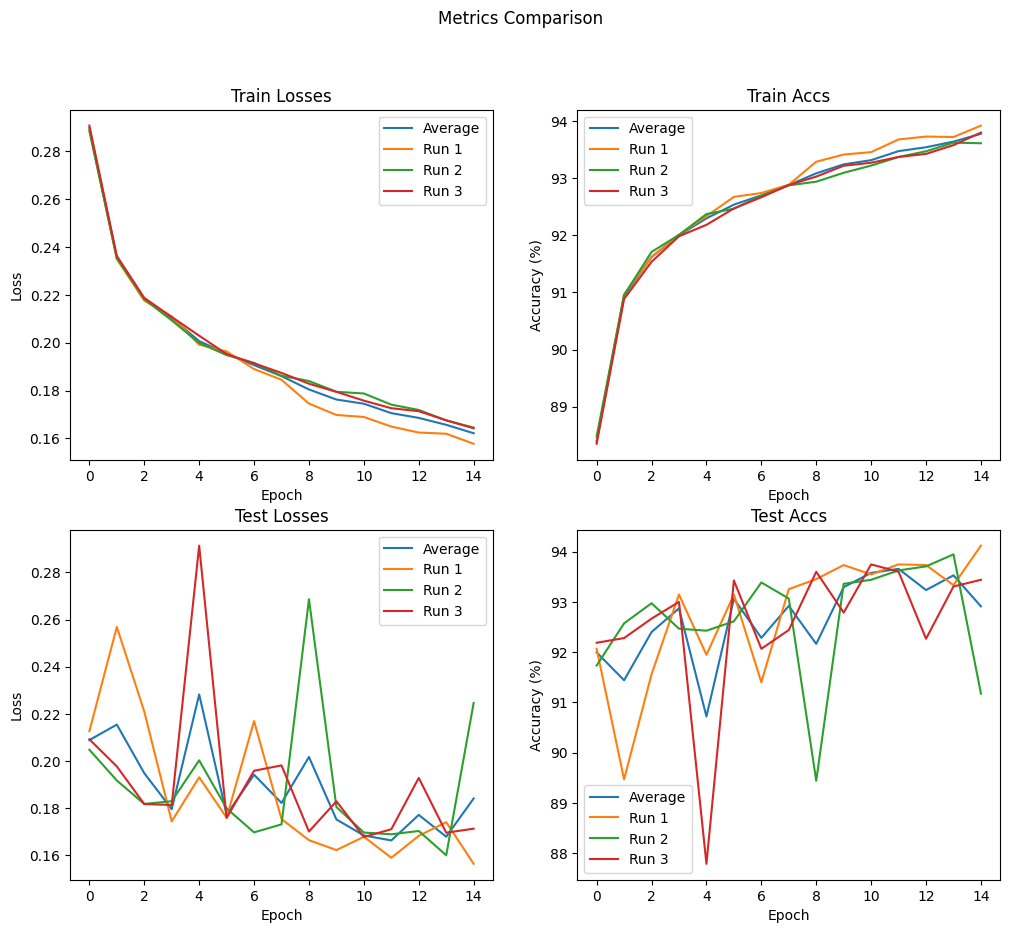

,Run,Epoch,Train Loss,Train Accuracy,Test Loss,Test Accuracy
0,Run 1,Epoch 1,0.289718,88.392222,0.212586,92.066667
1,Run 1,Epoch 2,0.234958,90.964444,0.256867,89.466667
2,Run 1,Epoch 3,0.217556,91.614444,0.220954,91.560000
3,Run 1,Epoch 4,0.210882,92.005556,0.174307,93.146667
4,Run 1,Epoch 5,0.199128,92.332222,0.193019,91.946667
5,Run 1,Epoch 6,0.196343,92.668889,0.175880,93.146667
6,Run 1,Epoch 7,0.188983,92.736667,0.216908,91.400000
7,Run 1,Epoch 8,0.184491,92.881111,0.175268,93.253333
8,Run 1,Epoch 9,0.174531,93.283333,0.166323,93.453333
9,Run 1,Epoch 10,0.169788,93.408889,0.162110,93.733333


,Run,Epoch,Train Loss,Train Accuracy,Test Loss,Test Accuracy
0,Run 1,Epoch 1,0.289718,88.392222,0.212586,92.066667
1,Run 1,Epoch 2,0.234958,90.964444,0.256867,89.466667
2,Run 1,Epoch 3,0.217556,91.614444,0.220954,91.560000
3,Run 1,Epoch 4,0.210882,92.005556,0.174307,93.146667
4,Run 1,Epoch 5,0.199128,92.332222,0.193019,91.946667
5,Run 1,Epoch 6,0.196343,92.668889,0.175880,93.146667
6,Run 1,Epoch 7,0.188983,92.736667,0.216908,91.400000
7,Run 1,Epoch 8,0.184491,92.881111,0.175268,93.253333
8,Run 1,Epoch 9,0.174531,93.283333,0.166323,93.453333
9,Run 1,Epoch 10,0.169788,93.408889,0.162110,93.733333


In [11]:
# Function to plot individual runs as separate lines on the same set of subplots
def plot_individual_runs(all_metrics, title):
    for i, metrics in enumerate(all_metrics):
        plot_metrics(metrics, axes, f"Run {i+1} - {title}")

# Function to plot the metrics of all runs and their average on the same set of subplots
def plot_metrics_with_average(avg_metrics, all_metrics, title):
    fig, axes = plt.subplots(2, 2, figsize=(12, 10))
    axes = axes.flatten()

    # Plot the average metrics
    plot_metrics(avg_metrics, axes, f"Average - {title}", label="Average")

    # Plot individual runs
    for i, metrics in enumerate(all_metrics):
        plot_metrics(metrics, axes, f"Run {i+1} - {title}", label=f"Run {i+1}")

    fig.suptitle(title)
    plt.show()
    
# Function to plot the metrics of a single run or the average on the given axes
def plot_metrics(metrics, axes, title, label):
    keys = ['train_losses', 'train_accs', 'test_losses', 'test_accs']
    ylabels = ['Loss', 'Accuracy (%)', 'Loss', 'Accuracy (%)']

    for i, (key, ylabel) in enumerate(zip(keys, ylabels)):
        ax = axes[i]
        ax.plot(metrics[key], label=label)
        ax.set_title(key.replace('_', ' ').title())
        ax.set_xlabel('Epoch')
        ax.set_ylabel(ylabel)
        ax.legend()

# Plot the metrics of all runs and their average
plot_metrics_with_average(avg_metrics, all_metrics, 'Metrics Comparison')

# Function to create a table that displays the metrics for each run and their average
def display_metrics_table(avg_metrics, all_metrics):
    data = []
    columns = ["Run", "Epoch", "Train Loss", "Train Accuracy", "Test Loss", "Test Accuracy"]

    for run, metrics in enumerate(all_metrics):
        for epoch in range(len(metrics['train_losses'])):
            data.append([f"Run {run + 1}",
                         f"Epoch {epoch + 1}",
                         metrics['train_losses'][epoch],
                         metrics['train_accs'][epoch],
                         metrics['test_losses'][epoch],
                         metrics['test_accs'][epoch]])

    for epoch in range(len(avg_metrics['train_losses'])):
        data.append(["Average",
                     f"Epoch {epoch + 1}",
                     avg_metrics['train_losses'][epoch],
                     avg_metrics['train_accs'][epoch],
                     avg_metrics['test_losses'][epoch],
                     avg_metrics['test_accs'][epoch]])

    df = pd.DataFrame(data, columns=columns)
    display(df)

# Display the tabular representation of the metrics
display_metrics_table(avg_metrics, all_metrics)


# Display the tabular representation of the metrics
display_metrics_table(avg_metrics, all_metrics)


### 8. Save model and evaluate

In this code snippet, the best model is saved, loaded, and evaluated on a given dataset. The following steps are executed:

- A "models" directory is created if it doesn't already exist using the os.makedirs function with the exist_ok=True parameter.
- The best model's state dictionary (which contains the model's weights) is saved to a file called "best_model2.pth" in the "models" directory using torch.save.
- The best model is loaded by first initializing an instance of the VGGNet2 model and then loading the saved state dictionary from "best_model.pth" using torch.load.
- The model is moved to the appropriate device (CPU or GPU) and set to evaluation mode using model.to(device) and model.eval(), respectively. Evaluation mode is important for models with components like dropout or batch normalization that behave differently during training and inference.
- The model is evaluated on the test data. A loop iterates over the test data loader (testLoader), moving the input and label data to the appropriate device. The model's predictions are obtained by forwarding the inputs through the model (outputs = model(inputs)), and the predicted class labels are determined by finding the index with the maximum value in the output tensor (_, predicted = torch.max(outputs.data, 1)).
- The number of correct and total predictions are accumulated, and the accuracy is calculated as the ratio of correct predictions to total predictions. The accuracy is then printed as a percentage.

In summary, this code snippet demonstrates how to save the best model's weights, load them into a new instance of the model, set the model to evaluation mode, and evaluate its performance on test data to obtain the model's accuracy.

In [13]:
# Create the "models" directory if it does not exist
os.makedirs("models", exist_ok=True)

# Save the best model in the "models" directory
torch.save(best_model.state_dict(), "models/best_model3.pth")

In [10]:
# Load the best model
model = nnmodel.VGGNet2(0.5)
model.load_state_dict(torch.load("models/best_model3.pth"))

# Set model to evaluation mode
model = model.to(device)  # Move the model to the appropriate device
model.eval()

# Evaluate the model on your data
correct_predictions = 0
total_predictions = 0

with torch.no_grad():
    for inputs, labels in testLoader:
        inputs, labels = inputs.to(device), labels.to(device)  # Move data to the appropriate device
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total_predictions += labels.size(0)
        correct_predictions += (predicted == labels).sum().item()

accuracy = correct_predictions / total_predictions
print(f"Accuracy: {accuracy * 100:.2f}%")


Accuracy: 94.13%
